# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

In [1]:
##Imports
import requests
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

#### Two Methods used: 
#### Programmically Downloading file using Python, OS and Requests libraries
#### Manual download

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

What are the most frequent numbers for winning the lotto in New York. I plan to merge the Mega Millions and Powerball to get a larger data set.

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**

Type: CSV

Method: Programmically downloaded

Dataset variables: Winning Numbers, Multiplyer

In [2]:
# URL of the dataset
url = 'https://data.ny.gov/api/views/d6yy-54nr/rows.csv?accessType=DOWNLOAD'
folder_name = 'Powerball_MegaMillions_Data'
file_name = 'Powerball_Winning_Numbers.csv'
# Create the folder if it doesn't exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
# Full path for the file
path = os.path.join(folder_name, file_name)
# Sending a request to the URL
dlData = requests.get(url)
# Check if the request was successful
if dlData.status_code == 200:
    # Write the content to the file
    with open(path, 'wb') as file:
        file.write(dlData.content)
    print("File downloaded successfully in folder:", folder_name)
else:
    print("Failed to download the file. Status code:")

File downloaded successfully in folder: Powerball_MegaMillions_Data


In [3]:
df_pb = pd.read_csv("Powerball_MegaMillions_Data/Powerball_Winning_Numbers.csv")

In [4]:
df_pb.head()

,Draw Date,Winning Numbers,Multiplier
0,09/26/2020,11 21 27 36 62 24,3.0
1,09/30/2020,14 18 36 49 67 18,2.0
2,10/03/2020,18 31 36 43 47 20,2.0
3,10/07/2020,06 24 30 53 56 19,2.0
4,10/10/2020,05 18 23 40 50 18,3.0


#### Dataset 2

Type: CSV

Method: *FILL IN* (e.g., The data was gathered using the "API" method from Y source.)

Dataset variables:

*   *Variable 1 FILL IN* (e.g., H_MEAN: Mean hourly wage)
*   *Variable 2 FILL IN*

In [5]:
#Manually Downloaded.
df_mm = pd.read_csv("Powerball_MegaMillions_Data/Lottery_Mega_Millions_Winning_Numbers__Beginning_2002.csv")
df_mm.head()

,Draw Date,Winning Numbers,Mega Ball,Multiplier
0,09/25/2020,20 36 37 48 67,16,2.0
1,09/29/2020,14 39 43 44 67,19,3.0
2,10/02/2020,09 38 47 49 68,25,2.0
3,10/06/2020,15 16 18 39 59,17,3.0
4,10/09/2020,05 11 25 27 64,13,2.0


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

In [6]:
#Inspecting the dataframe visually
df_pb.head()

,Draw Date,Winning Numbers,Multiplier
0,09/26/2020,11 21 27 36 62 24,3.0
1,09/30/2020,14 18 36 49 67 18,2.0
2,10/03/2020,18 31 36 43 47 20,2.0
3,10/07/2020,06 24 30 53 56 19,2.0
4,10/10/2020,05 18 23 40 50 18,3.0


array([[<AxesSubplot: title={'center': 'Multiplier'}>, <AxesSubplot: >,
        <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

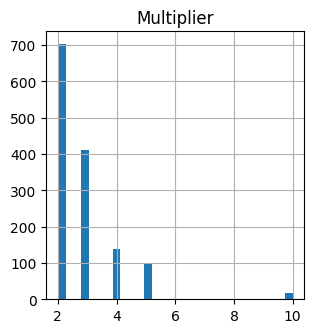

In [7]:
df_pb.hist(bins=30, layout=(2, 3), figsize=(12, 8))

In [8]:
#MegaWrangle 
def MegaWrangle(df,shape,types,scribe,isNull,dupes):
   if shape == "Yes":
     print(df.shape)
   elif types == "Yes":
     print(df.dtypes)
   elif scribe == "Yes":
     print(df.describe())
   elif isNull == "Yes":
     print(df.isnull().sum())
   elif dupes == "Yes":
        duplicates = df[df.duplicated(keep=False)]
        print(duplicates)
cdf = df_pb
MegaWrangle(cdf,"Yes","No","No","No","No")
MegaWrangle(cdf,"No","Yes","No","No","No")
MegaWrangle(cdf,"No","No","Yes","No","No")
MegaWrangle(cdf,"No","No","No","Yes","No")
MegaWrangle(cdf,"No","No","No","No","Yes")

(1572, 3)
Draw Date           object
Winning Numbers     object
Multiplier         float64
dtype: object
        Multiplier
count  1362.000000
mean      2.809104
std       1.199549
min       2.000000
25%       2.000000
50%       2.000000
75%       3.000000
max      10.000000
Draw Date            0
Winning Numbers      0
Multiplier         210
dtype: int64
Empty DataFrame
Columns: [Draw Date, Winning Numbers, Multiplier]
Index: []


### Data issues with Powerball Data: 
### Data type issues: 
    1. Draw Date is object instead of Datetime
    2. Winning number is object not int (Will seperate indiviual numbers and each will be in)
### Other Issues: 
    1. Winning numbers are in a "list" inside of the varible. Will need to seperate these to ensure a good analysis
    2. I was considering dropping Multiplyer. But it may be interesting to see if we have any trends based on that. 
    3. Power ball is not a seperate var like it is set up in the mega million data. I will need to make sure the final number in the "winning numbers" gets correct
### Justification:
             Visual: Histograms is a good way to see what each of the vars look like. in this case, I noticed that Mega had "MegaBall" and powerball did not.
             Programmitically: I have noticed data types were off. Winning numbers and Drawdate seen on the data type issues above. 
### This leads into the tidness issues. Winning numbers are a single data var instead of seperate numbers for PowerBall

### Quality Issue 2:

In [9]:
#Inspecting the dataframe visually
df_mm.head()

,Draw Date,Winning Numbers,Mega Ball,Multiplier
0,09/25/2020,20 36 37 48 67,16,2.0
1,09/29/2020,14 39 43 44 67,19,3.0
2,10/02/2020,09 38 47 49 68,25,2.0
3,10/06/2020,15 16 18 39 59,17,3.0
4,10/09/2020,05 11 25 27 64,13,2.0


array([[<AxesSubplot: title={'center': 'Mega Ball'}>,
        <AxesSubplot: title={'center': 'Multiplier'}>, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

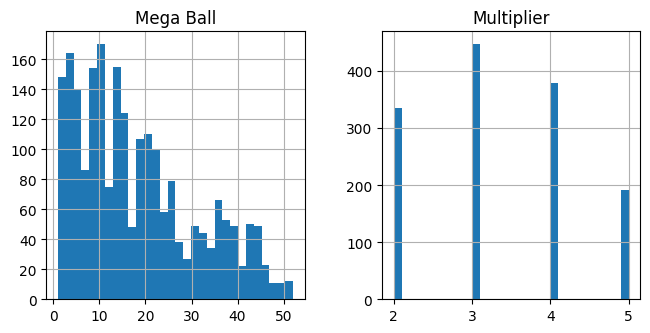

In [10]:
df_mm.hist(bins=30, layout=(2, 3), figsize=(12, 8))

In [11]:
#FILL IN - Inspecting the dataframe programmatically
#MegaWrangle 
def MegaWrangle(df,shape,types,scribe,isNull,dupes):
   if shape == "Yes":
     print(df.shape)
   elif types == "Yes":
     print(df.dtypes)
   elif scribe == "Yes":
     print(df.describe())
   elif isNull == "Yes":
     print(df.isnull().sum())
   elif dupes == "Yes":
        duplicates = df[df.duplicated(keep=False)]
        print(duplicates)
cdf = df_mm
MegaWrangle(cdf,"Yes","No","No","No","No")
MegaWrangle(cdf,"No","Yes","No","No","No")
MegaWrangle(cdf,"No","No","Yes","No","No")
MegaWrangle(cdf,"No","No","No","Yes","No")
MegaWrangle(cdf,"No","No","No","No","Yes")

(2256, 4)
Draw Date           object
Winning Numbers     object
Mega Ball            int64
Multiplier         float64
dtype: object
         Mega Ball   Multiplier
count  2256.000000  1353.000000
mean     18.163564     3.314117
std      12.813322     0.997593
min       1.000000     2.000000
25%       8.000000     3.000000
50%      15.000000     3.000000
75%      25.000000     4.000000
max      52.000000     5.000000
Draw Date            0
Winning Numbers      0
Mega Ball            0
Multiplier         903
dtype: int64
Empty DataFrame
Columns: [Draw Date, Winning Numbers, Mega Ball, Multiplier]
Index: []


In [12]:
cdf = df_pb
MegaWrangle(cdf,"Yes","No","No","No","No")
MegaWrangle(cdf,"No","Yes","No","No","No")
MegaWrangle(cdf,"No","No","Yes","No","No")
MegaWrangle(cdf,"No","No","No","Yes","No")
MegaWrangle(cdf,"No","No","No","No","Yes")

(1572, 3)
Draw Date           object
Winning Numbers     object
Multiplier         float64
dtype: object
        Multiplier
count  1362.000000
mean      2.809104
std       1.199549
min       2.000000
25%       2.000000
50%       2.000000
75%       3.000000
max      10.000000
Draw Date            0
Winning Numbers      0
Multiplier         210
dtype: int64
Empty DataFrame
Columns: [Draw Date, Winning Numbers, Multiplier]
Index: []


### Data issues with Mega Million Data: 
### Data type issues: 
    1. Draw Date is object instead of Datetime
    2. Winning number is object not int (Will seperate indiviual numbers and each will be in)
### Other Issues: 
    1. Winning numbers are in a "list" inside of the varible. Will need to seperate these to ensure a good analysis
    2. I was considering dropping Multiplyer. But it may be interesting to see if we have any trends based on that. 
### Justification:
             Visual: Histograms is a good way to see what each of the vars look like. in this case, I noticed that Mega had "MegaBall" and powerball did not.
             Programmitically: I have noticed data types were off. Winning numbers and Drawdate seen on the data type issues above. 
### This leads into the tidness issues. Winning numbers are a single data var instead of seperate numbers for mega millions
## The data is similar where the issues are about the same. Mega Millions just did not have the same issue of missing the power ball / mega ball var. Mega ball is also already an int so we do not need to fix that. 

# Tidiness Issues can be found above

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [13]:
#Mega copy
df_mmc = df_mm.copy()
#Powerball copy
df_pbc = df_pb.copy()

### Set Nulls of each DF to the median

In [14]:
median_value = df_pbc['Multiplier'].median()
# Fill Na values in 'Multiplier' with the median value
df_pbc['Multiplier'] = df_pbc['Multiplier'].fillna(median_value)

In [15]:
median_value = df_mmc['Multiplier'].median()
# Fill Na values with median
df_mmc['Multiplier'] = df_mmc['Multiplier'].fillna(median_value)

### Need to split column Winning Numbers into seperate numbers, and switch to int data type for the Mega Millions Data

In [16]:
#Split column for winning numbers into individual numbers
split_columns = df_mmc['Winning Numbers'].str.split(' ', expand=True)
#Makes all new columns int
split_columns = split_columns.rename(columns=lambda x: f'mm_num_{x+1}').apply(pd.to_numeric)
#join back to main dataframe
df_mmc = df_mmc.join(split_columns)
df_mmc.head()

,Draw Date,Winning Numbers,Mega Ball,Multiplier,mm_num_1,mm_num_2,mm_num_3,mm_num_4,mm_num_5
0,09/25/2020,20 36 37 48 67,16,2.0,20,36,37,48,67
1,09/29/2020,14 39 43 44 67,19,3.0,14,39,43,44,67
2,10/02/2020,09 38 47 49 68,25,2.0,9,38,47,49,68
3,10/06/2020,15 16 18 39 59,17,3.0,15,16,18,39,59
4,10/09/2020,05 11 25 27 64,13,2.0,5,11,25,27,64


In [17]:
# Drop the 'Winning Numbers' column
df_mmc = df_mmc.drop('Winning Numbers', axis=1)
# Define the new order of columns
new_column_order = ['Draw Date', 'mm_num_1', 'mm_num_2', 'mm_num_3', 'mm_num_4', 'mm_num_5','Mega Ball','Multiplier']
# Reorder the columns
df_mmc = df_mmc[new_column_order]

In [18]:
df_mmc.head()

,Draw Date,mm_num_1,mm_num_2,mm_num_3,mm_num_4,mm_num_5,Mega Ball,Multiplier
0,09/25/2020,20,36,37,48,67,16,2.0
1,09/29/2020,14,39,43,44,67,19,3.0
2,10/02/2020,9,38,47,49,68,25,2.0
3,10/06/2020,15,16,18,39,59,17,3.0
4,10/09/2020,5,11,25,27,64,13,2.0


Justification: *FILL IN*

### Fix Data Types: Date needs to be Date Time, and Multi needs to be Int. 

In [19]:
df_mmc['Draw Date'] = pd.to_datetime(df_pbc['Draw Date'])
df_mmc['Multiplier'] = df_pbc['Multiplier'].astype(int)

In [20]:
cdf = df_pbc
MegaWrangle(cdf,"No","Yes","No","No","No")

Draw Date           object
Winning Numbers     object
Multiplier         float64
dtype: object


#### Needed to change to different types of data for analysis

### Need to split column Winning Numbers into seperate numbers, and switch to int data type for the Power Ball Data

In [21]:
# Assuming 'list_column' is your column with the list of numbers
split_columns = df_pbc['Winning Numbers'].str.split(' ', expand=True)
# Optionally, rename these new columns and convert them to numeric
split_columns = split_columns.rename(columns=lambda x: f'pb_num_{x+1}').apply(pd.to_numeric)
# Join these new columns back to your original DataFrame
df_pbc = df_pbc.join(split_columns)

In [22]:
# Drop the 'Winning Numbers' column
df_pbc = df_pbc.drop('Winning Numbers', axis=1)
# Define the new order of columns
new_column_order = ['Draw Date', 'pb_num_1', 'pb_num_2', 'pb_num_3', 'pb_num_4', 'pb_num_5', 'pb_num_6', 'Multiplier']
# Reorder the columns
df_pbc = df_pbc[new_column_order]
#Renamed Number 6 to PowerNum
df_pbc = df_pbc.rename(columns={'pb_num_6': 'PowerNum'})

In [23]:
df_pbc.head()

,Draw Date,pb_num_1,pb_num_2,pb_num_3,pb_num_4,pb_num_5,PowerNum,Multiplier
0,09/26/2020,11,21,27,36,62,24,3.0
1,09/30/2020,14,18,36,49,67,18,2.0
2,10/03/2020,18,31,36,43,47,20,2.0
3,10/07/2020,6,24,30,53,56,19,2.0
4,10/10/2020,5,18,23,40,50,18,3.0


Allows us to count each occurance of every number now that they are seperate

### ### Fix Data Types: Date needs to be Date Time, and Multi needs to be Int. 

In [24]:
df_pbc['Draw Date'] = pd.to_datetime(df_pbc['Draw Date'])
df_pbc['Multiplier'] = df_pbc['Multiplier'].astype(int)

In [25]:
cdf = df_mmc
MegaWrangle(cdf,"No","Yes","No","No","No")

Draw Date     datetime64[ns]
mm_num_1               int64
mm_num_2               int64
mm_num_3               int64
mm_num_4               int64
mm_num_5               int64
Mega Ball              int64
Multiplier           float64
dtype: object


## Fixed data types so analysis is possible and neat. 

In [26]:
cdf = df_mmc
MegaWrangle(cdf,"No","Yes","No","No","No")

Draw Date     datetime64[ns]
mm_num_1               int64
mm_num_2               int64
mm_num_3               int64
mm_num_4               int64
mm_num_5               int64
Mega Ball              int64
Multiplier           float64
dtype: object


In [27]:
df_mmc['Draw Date'] = pd.to_datetime(df_pbc['Draw Date'])
df_mmc['Multiplier'] = df_pbc['Multiplier'].astype(int)

In [28]:
cdf = df_pbc
MegaWrangle(cdf,"No","Yes","No","No","No")

Draw Date     datetime64[ns]
pb_num_1               int64
pb_num_2               int64
pb_num_3               int64
pb_num_4               int64
pb_num_5               int64
PowerNum               int64
Multiplier             int64
dtype: object


#### Fixed data types so analysis is possible and neat. 

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [29]:
df_allin = pd.concat([df_mmc, df_pbc], ignore_index=True)
x = df_mmc.shape
y = df_pbc.shape
z = df_allin.shape
print(x)
print(y)
print(z)
print(2256 + 1572)

(2256, 8)
(1572, 8)
(3828, 14)
3828


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [30]:
df_allin.to_csv('mergeddata.csv', index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* FILL IN from answer to Step 1

In [31]:
# Columns representing the drawn numbers
number_columns = ['mm_num_1', 'mm_num_2', 'mm_num_3', 'mm_num_4', 'mm_num_5','pb_num_1', 'pb_num_2', 'pb_num_3', 'pb_num_4', 'pb_num_5']
# Aggregate counts for each number
number_counts = pd.Series(dtype=int)
for col in number_columns:
    number_counts = number_counts.add(df_allin[col].value_counts(), fill_value=0)
# Sort the counts
number_counts = number_counts.sort_values(ascending=False)

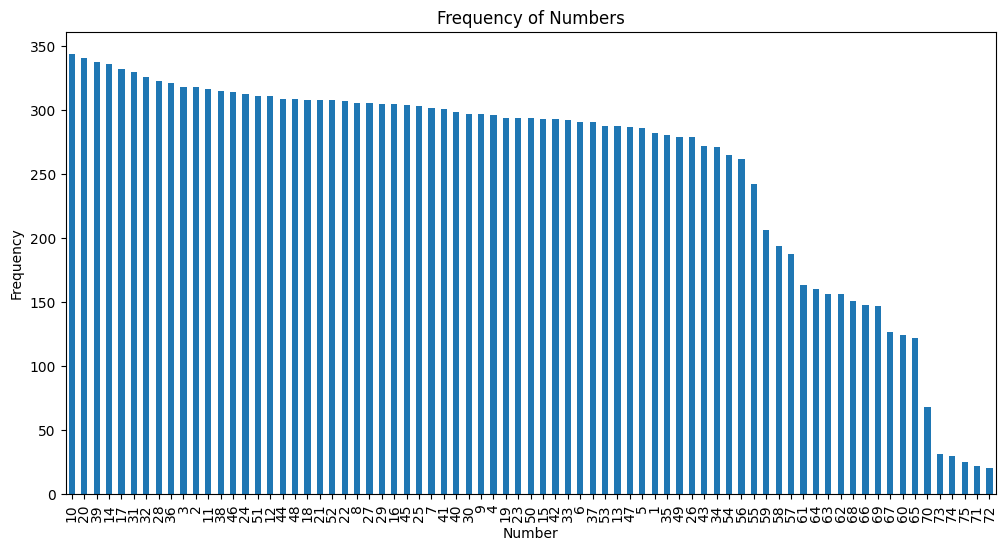

In [32]:
# Creating a bar chart
number_counts.index = number_counts.index.astype(int)
number_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Frequency of Numbers')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.show()

## This shows amazing insights for the most freq. numbers. It seems that in a trend, numbers below 60 have a much higher chance of being chosen. 

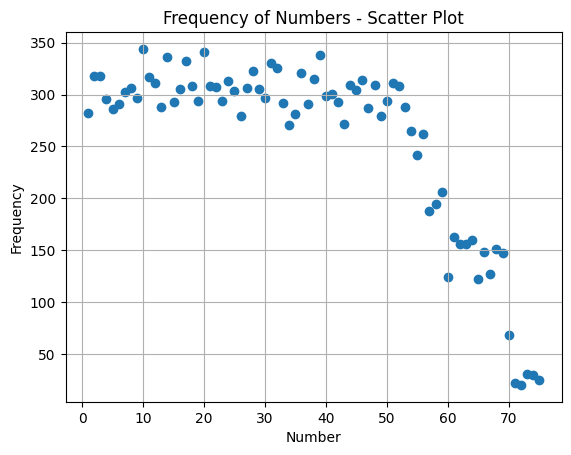

In [33]:
#Creating a scatter plot
plt.scatter(number_counts.index, number_counts.values)
plt.title('Frequency of Numbers - Scatter Plot')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## This is a view based on order of the numbers. We can see a large drop off near the 55 range until hitting a low of 70

### **5.2:** Reflection
#### If I had a large amount of time, I would gather from each state, and see what numbers are chosen the most often from each state. Once that is complete, comparing all the data so I could get a nation wide data set and see if the numbers change. 